# Interested
1) Interested in what pattern is predominantly observed between reason of call and transfer to floor.
2) How does reason and situation attributes affect the pattern?


In [1]:
import numpy as np
import glob
import pandas as pd

def load_dataframes(folder_path):
        csv_files = glob.glob(folder_path + '/*.csv')
        dataframes = []
        for file in csv_files:
            df = pd.read_csv(file)
            dataframes.append(df)
        return dataframes

folder_path = r'C:\Users\benni\Box\Data Set for Competition'
dataframes = load_dataframes(folder_path)
df = pd.concat((dataframes[0],dataframes[1]),axis=0)
no_accounts_cols = [col for col in df.columns if 'no_of_accounts' in col]
balance_cols = [col for col in df.columns if 'account_balance' in col]
df[no_accounts_cols] = df[no_accounts_cols].apply(lambda y: y.apply(lambda x: 0 if np.isnan(x) else x), axis = 0)
df[balance_cols ] = df[balance_cols ].apply(lambda y: y.apply(lambda x: 0 if np.isnan(x) else x), axis = 0)
mapping = {'resolved': {val:i for i, val in enumerate(df['resolved'].unique())}
            , 'card_activation': {val:i for i, val in enumerate(set(list(df['card_activation_status_13_march'].unique())+list(df['card_activation_status_18_march'].unique())))}
            , 'eservice': {val:i for i, val in enumerate(set(list(df['eservice_ind_13_march'].unique())+list(df['eservice_ind_18_march'].unique())))}
            , 'account_status': {val:i for i, val in enumerate(set(list(df['account_status_13_march'].unique())+list(df['account_status_18_march'].unique())))}
            , 'delinquency_history': {val:i for i, val in enumerate(set(list(df['delinquency_history_13_march'].unique())+list(df['delinquency_history_18_march'].unique())))}
            , 'retailer_code': {val:i for i, val in enumerate(df['retailer_code'].unique())}
            , 'ebill':{val:i for i, val in enumerate(set(list(df['ebill_enrolled_status_13_march'].unique())+list(df['ebill_enrolled_status_18_march'].unique())))}
         }

df['resolved'] = df['resolved'].map(mapping['resolved'])
df.loc[(df['mos'].str.contains('TR')) & (df.resolved == 0), 'resolved'] = 1
df['card_activation_status_13_march'] = df['card_activation_status_13_march'].map(mapping['card_activation'])
df['card_activation_status_18_march'] = df['card_activation_status_18_march'].map(mapping['card_activation'])
df['eservice_ind_13_march'] = df['eservice_ind_13_march'].map(mapping['eservice'])
df['eservice_ind_18_march'] = df['eservice_ind_18_march'].map(mapping['eservice'])
df['account_status_13_march'] = df['account_status_13_march'].map(mapping['account_status'])
df['account_status_18_march'] = df['account_status_18_march'].map(mapping['account_status'])
df['delinquency_history_13_march'] = df['delinquency_history_13_march'].map(mapping['delinquency_history'])
df['delinquency_history_18_march'] = df['delinquency_history_18_march'].map(mapping['delinquency_history'])
df['retailer_code'] = df['retailer_code'].map(mapping['retailer_code'])
df['ebill_enrolled_status_13_march'] = df['ebill_enrolled_status_13_march'].map(mapping['ebill'])
df['ebill_enrolled_status_18_march'] = df['ebill_enrolled_status_18_march'].map(mapping['ebill'])

df['no_of_accounts_diff'] = df.apply(lambda x:1 if x['no_of_accounts_with_syf_13_march'] != x['no_of_accounts_with_syf_18_march'] else 0 , axis=1)
df['account_balance_diff'] = df.apply(lambda x: 1 if x['account_balance_13_march'] != x['account_balance_18_march'] else 0, axis=1)
df['card_activation_status_diff'] = df.apply(lambda x: 1 if x['card_activation_status_13_march'] != x['card_activation_status_18_march'] else 0, axis=1)
df['delinquency_history_diff'] = df.apply(lambda x: 1 if x['delinquency_history_13_march'] != x['delinquency_history_18_march'] else 0, axis=1)
df['ebill_enrolled_status_diff'] = df.apply(lambda x: 1 if x['ebill_enrolled_status_13_march'] != x['ebill_enrolled_status_18_march'] else 0, axis=1)
df['account_status_diff'] = df.apply(lambda x: 1 if x['account_status_13_march'] != x['account_status_18_march'] else 0, axis=1)
df['account_open_date_diff'] = df.apply(lambda x: 1 if x['account_open_date_13_march'] != x['account_open_date_18_march'] else 0, axis=1)
df['eservice_diff'] = df.apply(lambda x: 1 if x['eservice_ind_13_march'] != x['eservice_ind_18_march'] else 0, axis=1)


In [16]:
len(df[df.resolved == 0]), len(df[df.resolved == 1]), len(df)

(577138, 1221660, 1798798)

In [190]:
df[(df['mos'].str.contains('TR')) & (df.resolved == 0)]

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,no_of_accounts_diff,account_balance_diff,card_activation_status_diff,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff


In [191]:
mapping

{'resolved': {'resolved': 0, 'floor': 1},
 'card_activation': {' ': 0, '7': 1, '0': 2, '8': 3},
 'eservice': {0: 0, 1: 1},
 'account_status': {'Z': 0,
  'L': 1,
  'B': 2,
  'F': 3,
  'I': 4,
  'U': 5,
  'A': 6,
  nan: 7,
  'E': 8,
  'C': 9},
 'delinquency_history': {'[02]': 0,
  '[87]': 1,
  '[47]': 2,
  '[57]': 3,
  '[68]': 4,
  '[46]': 5,
  '[30]': 6,
  '[40]': 7,
  '[77]': 8,
  '[36]': 9,
  '[42]': 10,
  '[58]': 11,
  '[04]': 12,
  '[27]': 13,
  '[55]': 14,
  '[06]': 15,
  '[53]': 16,
  '[78]': 17,
  '[22]': 18,
  '[48]': 19,
  '[76]': 20,
  '[33]': 21,
  '[32]': 22,
  '[05]': 23,
  '[35]': 24,
  '[54]': 25,
  '[45]': 26,
  '[23]': 27,
  '[08]': 28,
  '[56]': 29,
  '[37]': 30,
  '[07]': 31,
  '[66]': 32,
  '[24]': 33,
  '[25]': 34,
  '[65]': 35,
  '[34]': 36,
  '[43]': 37,
  '[88]': 38,
  '[26]': 39,
  '[67]': 40,
  '[44]': 41,
  '[80]': 42,
  '[38]': 43,
  '[20]': 44,
  '[03]': 45,
  '[00]': 46},
 'retailer_code': {'D': 0,
  'E': 1,
  'J': 2,
  'I': 3,
  'B': 4,
  'A': 5,
  'C': 6,

In [5]:
# remove the well-handled known reasons
df_filtered = df#[~df.reason.isin(['PP', 'BA'])]
# how many rows are left
print(f"out of {len(df)} rows, {len(df_filtered)} rows are left")
# the top 10 reasons for a call aside from PP and BA
inds = df_filtered.groupby('reason').agg(cnt=('reason', 'count')).sort_values('cnt',ascending=False).head(10).index
print(f"the top 10 reasons for call: {inds}")
# the top 10 reasons for which call goes to floor

out of 1798798 rows, 1798798 rows are left
the top 10 reasons for call: Index(['PP', 'BA', 'PT', 'AT', 'AA', 'CT', 'wa', 'LS', 'FD', 'LC'], dtype='object', name='reason')


In [193]:
for reason in inds:
    print(f"for reason {reason}, resolved:{len(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved == 0)])}, not resolved:{len(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved == 1)])}")

for reason PP, resolved:4212, not resolved:674102
for reason BA, resolved:405004, not resolved:161347
for reason PT, resolved:2951, not resolved:218632
for reason AT, resolved:82537, not resolved:8867
for reason AA, resolved:37643, not resolved:17218
for reason CT, resolved:599, not resolved:23197
for reason wa, resolved:938, not resolved:13358
for reason LS, resolved:3884, not resolved:9881
for reason FD, resolved:0, not resolved:13007
for reason LC, resolved:593, not resolved:9483


In [194]:
# check that the reason for call is in MOS sequence
print(f"from {len(df_filtered)} rows, {sum(df_filtered.apply(lambda x: 1 if x['reason'] in x['mos'] else 0, axis=1))} rows have the reason in MOS sequence")

from 1798798 rows, 1768826 rows have the reason in MOS sequence


In [195]:
# remove the ones that do not include reason in MOS
df_filtered['reason_in_mos'] = df_filtered.apply(lambda x: 1 if x['reason'] in x['mos'] else 0, axis=1)
df_filtered = df_filtered[df_filtered.reason_in_mos == 1]
df_filtered

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_18_march,no_of_accounts_diff,account_balance_diff,card_activation_status_diff,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff,reason_in_mos
0,240315173250 DAL1OA3M,0,10010009499,PP,IA PP TR,1,1.0,0.00,46,5/19/2013,...,0,0,0,0,0,0,0,0,0,1
1,240315124742 DAL15XHK,1,10006021998,BA,IA BA TS nl TR,1,2.0,143.28,46,9/22/2003,...,0,0,0,0,0,0,0,0,0,1
2,240317114237 DAL3BLK6,2,10016007830,PT,IA AA BA MR nl PT TR,1,12.0,0.00,46,9/4/2017,...,0,0,0,0,0,0,0,0,0,1
3,240314120849 PHX6PL4U,1,10008003199,BA,IA BA,0,2.0,44.98,46,2/7/2024,...,0,0,1,0,0,0,0,0,0,1
4,240314145902 DAL68RYS,3,10013002037,BA,IA BA TS nl mm TR,1,6.0,7.00,46,1/2/2022,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894159,240314080117 DAL3CVDQ,27,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,1,9.0,680.86,46,12/19/2023,...,0,0,0,0,0,0,0,0,0,1
894160,240314120118 DAL2JPAQ,33,20012001463,BA,IA BA TA nl,0,14.0,1314.94,46,2/8/2022,...,0,0,0,0,0,0,0,0,0,1
894161,240314120336 DAL4K2UN,33,20012001463,BA,IA BA,0,14.0,1314.94,46,2/8/2022,...,0,0,0,0,0,0,0,0,0,1
894162,240316190932 PHX2S13U,25,20001160188,PP,IA PP TR,1,7.0,35.66,46,8/24/2023,...,0,0,0,0,0,0,0,0,0,1


In [196]:
#add TR if mos does not have TR sequence in it
df_filtered['mos_TR'] = df_filtered['mos'].apply(lambda x: x+ " TR" if 'TR' not in x else x)
# break apart mos_TR sequence
df_filtered['mos_sequence_between'] = df_filtered.apply(lambda x: x['mos_TR'].split(' ')[x['mos_TR'].split(' ').index(x['reason'])+1:-1], axis = 1)
df_filtered

C:\Users\benni\AppData\Local\Temp\ipykernel_166640\1381216484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mos_TR'] = df_filtered['mos'].apply(lambda x: x+ " TR" if 'TR' not in x else x)
C:\Users\benni\AppData\Local\Temp\ipykernel_166640\1381216484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mos_sequence_between'] = df_filtered.apply(lambda x: x['mos_TR'].split(' ')[x['mos_TR'].split(' ').index(x['reason'])+1:-1], axis = 1)


,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_diff,card_activation_status_diff,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff,reason_in_mos,mos_TR,mos_sequence_between
0,240315173250 DAL1OA3M,0,10010009499,PP,IA PP TR,1,1.0,0.00,46,5/19/2013,...,0,0,0,0,0,0,0,1,IA PP TR,[]
1,240315124742 DAL15XHK,1,10006021998,BA,IA BA TS nl TR,1,2.0,143.28,46,9/22/2003,...,0,0,0,0,0,0,0,1,IA BA TS nl TR,"[TS, nl]"
2,240317114237 DAL3BLK6,2,10016007830,PT,IA AA BA MR nl PT TR,1,12.0,0.00,46,9/4/2017,...,0,0,0,0,0,0,0,1,IA AA BA MR nl PT TR,[]
3,240314120849 PHX6PL4U,1,10008003199,BA,IA BA,0,2.0,44.98,46,2/7/2024,...,1,0,0,0,0,0,0,1,IA BA TR,[]
4,240314145902 DAL68RYS,3,10013002037,BA,IA BA TS nl mm TR,1,6.0,7.00,46,1/2/2022,...,0,0,0,0,0,0,0,1,IA BA TS nl mm TR,"[TS, nl, mm]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894159,240314080117 DAL3CVDQ,27,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,1,9.0,680.86,46,12/19/2023,...,0,0,0,0,0,0,0,1,mn IA PP BA MR nl WA nl BA nl mt TR,"[MR, nl, WA, nl, BA, nl, mt]"
894160,240314120118 DAL2JPAQ,33,20012001463,BA,IA BA TA nl,0,14.0,1314.94,46,2/8/2022,...,0,0,0,0,0,0,0,1,IA BA TA nl TR,"[TA, nl]"
894161,240314120336 DAL4K2UN,33,20012001463,BA,IA BA,0,14.0,1314.94,46,2/8/2022,...,0,0,0,0,0,0,0,1,IA BA TR,[]
894162,240316190932 PHX2S13U,25,20001160188,PP,IA PP TR,1,7.0,35.66,46,8/24/2023,...,0,0,0,0,0,0,0,1,IA PP TR,[]


C:\Users\benni\AppData\Local\Temp\ipykernel_166640\3636625110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['len_mos_sequence_between'] = df_filtered['mos_sequence_between'].apply(lambda x: len(x))


resolved
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: len_mos_sequence_between, dtype: object

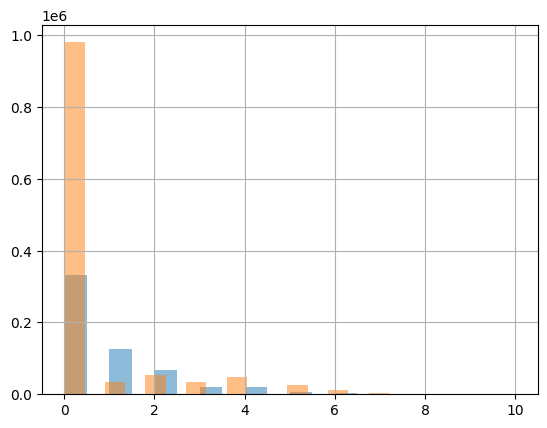

In [197]:
# look at the distribution of the length of the sequence depending on whether it is resolved or not
df_filtered['len_mos_sequence_between'] = df_filtered['mos_sequence_between'].apply(lambda x: len(x))
df_filtered.groupby('resolved').len_mos_sequence_between.hist(alpha=0.5, bins=20)


In [198]:
# check how many unique values are in the length of mos_sequence_between for resolved and not resolved  
print(f"these are the unique length values for resolved: {sorted(df_filtered[df_filtered.resolved == 0].len_mos_sequence_between.unique())}")
print(f"these are the unique length values for not resolved: {sorted(df_filtered[df_filtered.resolved == 1].len_mos_sequence_between.unique())}")

these are the unique length values for resolved: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
these are the unique length values for not resolved: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [199]:
print(df_filtered[df_filtered.resolved == 0].len_mos_sequence_between.describe()) 
print(df_filtered[df_filtered.resolved == 1].len_mos_sequence_between.describe())

count    575896.000000
mean          0.793305
std           1.233925
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: len_mos_sequence_between, dtype: float64
count    1.192930e+06
mean     5.690703e-01
std      1.397429e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: len_mos_sequence_between, dtype: float64


In [204]:
from collections import defaultdict
frequency_table = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
addition_table = defaultdict(lambda: defaultdict(int))
def get_frequencies(reason,resolved, list_of_strings):
    for i in range(len(list_of_strings)):
        string = ""
        for j in range(i+1, len(list_of_strings)):
            string += list_of_strings[j] + " "
            if abs(j-i) > 1:
                frequency_table[reason][resolved][string] += 1
                addition_table[resolved][string] += 1

df_filtered.apply(lambda x: get_frequencies(x['reason'],x['resolved'], x['mos_sequence_between']), axis=1)
for reason in inds:
    for resolved in [0,1]:
        print(f"for reason {reason}, resolved {resolved}")
        print(sorted(list(frequency_table[reason][resolved].items()), key = lambda x: x[1], reverse=True))


for reason PP, resolved 0
[('nl mm ', 6), ('mt RS ', 4), ('mm mo ', 4), ('nl AT ', 4), ('mt RS wa ', 3), ('RS wa ', 3), ('nl AT nl ', 3), ('AT nl ', 3), ('TS nl ', 2), ('nl BA ', 2), ('nl BA nl ', 2), ('nl BA nl mt ', 2), ('nl BA nl mt RS ', 2), ('nl BA nl mt RS wa ', 2), ('BA nl ', 2), ('BA nl mt ', 2), ('BA nl mt RS ', 2), ('BA nl mt RS wa ', 2), ('nl mt ', 2), ('nl mt RS ', 2), ('nl mt RS wa ', 2), ('mm mo CT ', 2), ('mo CT ', 2), ('CT mt ', 2), ('CT mt RS ', 2), ('nl mm mo ', 2), ('nl nl ', 2), ('nl AT nl AT ', 2), ('AT nl AT ', 2), ('TS nl BA ', 1), ('TS nl BA nl ', 1), ('TS nl BA nl mt ', 1), ('TS nl BA nl mt RS ', 1), ('TS nl BA nl mt RS wa ', 1), ('MR mm ', 1), ('MR mm AP ', 1), ('MR mm AP mm ', 1), ('MR mm AP mm mo ', 1), ('MR mm AP mm mo CT ', 1), ('MR mm AP mm mo CT mt ', 1), ('MR mm AP mm mo CT mt RS ', 1), ('mm AP ', 1), ('mm AP mm ', 1), ('mm AP mm mo ', 1), ('mm AP mm mo CT ', 1), ('mm AP mm mo CT mt ', 1), ('mm AP mm mo CT mt RS ', 1), ('AP mm ', 1), ('AP mm mo ', 1), (

In [205]:
for resolved in [0,1]:
    print(sorted(list(addition_table[resolved].items()), key = lambda x: x[1], reverse=True))


[('BA TS ', 19827), ('TS nl ', 15609), ('BA TS nl ', 15274), ('nl nl ', 12256), ('nl BA ', 9899), ('BA nl ', 9392), ('nl BA nl ', 7043), ('nl mm ', 6381), ('nl mt ', 3943), ('AT nl ', 3806), ('TS nl nl ', 3147), ('BA TS nl nl ', 3125), ('nl nl mt ', 2267), ('mm mo ', 1734), ('nl nl nl ', 1637), ('mt nl ', 1423), ('TS mm ', 1255), ('BA TS mm ', 1237), ('nl mt nl ', 1126), ('nl AT ', 1029), ('nl AT nl ', 906), ('PT nl ', 896), ('BA nl nl ', 878), ('nl nl mt nl ', 847), ('TS nl mm ', 831), ('BA TS nl mm ', 825), ('mt nl nl ', 817), ('nl mt nl nl ', 781), ('BA nl BA ', 766), ('AT nl BA ', 741), ('nl nl mt nl nl ', 709), ('mo mt ', 694), ('nl SP ', 670), ('nl BA nl BA ', 632), ('SP BA ', 626), ('nl AT nl BA ', 618), ('nl mm mo ', 614), ('TS nl nl mt ', 601), ('nl BA nl nl ', 600), ('BA TS nl nl mt ', 597), ('mm mo mt ', 579), ('AU nl ', 574), ('BA nl BA nl ', 553), ('nl PT ', 542), ('AT nl BA nl ', 520), ('nl SP BA ', 519), ('TS nl BA ', 507), ('BA TS nl BA ', 484), ('nl PT nl ', 478), ('BA

In [202]:
df_filtered.reason.unique()

array(['PP', 'BA', 'PT', 'PS', 'eL', 'AP', 'DR', 'AT', 'RP', 'wa', 'MP',
       'iM', 'CT', 'mp', 'me', 'WA', 'iR', 'eY', 'AA', 'DP', 'FM', 'CA',
       'IA', 'IC', 'RC', 'LC', 'CB', 'PA', 'RI', 'eP', 'LS', 'SP', 'mn',
       'PI', 'SR', 'iL', 'iF', 'CD', 'mP', 'GA', 'PC', 'DE', 'Pd', 'eR',
       'FI', 'iA', 'NU', 'iP', 'VP', 'ER', 'VA', 'eA', 'OB', 'AU', 'iS',
       'm-', 'iO', 'RS', 'mm', 'eS', 'BL', 'LW', 'mt', 'eB', 'ss', 'mo',
       'iT', 'HI'], dtype=object)

In [216]:
# are there sequences that are only in resolved or not resolved more than 1000
print(inds)
for reason in inds:
    
    length = len(df_filtered[df_filtered.reason == reason])
    print(f"for reason {reason}, length: {length}")
    for resolved in [0,1]:
        print(f"resolved {resolved}")
        print([seq for seq in set(frequency_table[reason][resolved].keys()) - set(frequency_table[reason][1-resolved].keys()) if frequency_table[reason][resolved][seq] >= 1000])

Index(['PP', 'BA', 'PT', 'AT', 'AA', 'CT', 'wa', 'LS', 'FD', 'LC'], dtype='object', name='reason')
for reason PP, length: 678314
resolved 0
[]
resolved 1
[]
for reason BA, length: 566351
resolved 0
[]
resolved 1
[]
for reason PT, length: 221583
resolved 0
[]
resolved 1
[]
for reason AT, length: 91404
resolved 0
[]
resolved 1
[]
for reason AA, length: 54861
resolved 0
[]
resolved 1
['nl mt RS ', 'TS nl nl mt RS ', 'nl nl mt RS ', 'BA TS nl nl mt RS ']
for reason CT, length: 23796
resolved 0
[]
resolved 1
[]
for reason wa, length: 14296
resolved 0
[]
resolved 1
[]
for reason LS, length: 13765
resolved 0
[]
resolved 1
[]
for reason FD, length: 13007
resolved 0
[]
resolved 1
[]
for reason LC, length: 10076
resolved 0
[]
resolved 1
[]


In [217]:
# are there sequences that are only in resolved or not resolved more than 10% of the time
for resolved in [0,1]:
    print(f"resolved {resolved}")
    length = len(df_filtered)
    print([seq for seq in set(addition_table[resolved].keys()) - set(addition_table[1-resolved].keys()) if addition_table[resolved][seq] >= 0.01*length])

resolved 0
[]
resolved 1
[]


In [218]:
# what are the reasons that are not included in the mos sequence
# remove the well-handled known reasons
df_filtered = df#[~df.reason.isin(['PP', 'BA'])]
# how many rows are left
print(f"out of {len(df)} rows, {len(df_filtered)} rows are left")
# remove the ones that do not include reason in MOS
df_filtered['reason_in_mos'] = df_filtered.apply(lambda x: 1 if x['reason'] in x['mos'] else 0, axis=1)
df_filtered = df_filtered[df_filtered.reason_in_mos == 0]
df_filtered.groupby('reason').agg(cnt=('reason', 'count')).sort_values('cnt',ascending=False)
# as you can see below, the top reasons that are not included were for fraud detection, account recovery, and dispute.

out of 1798798 rows, 1798798 rows are left


,cnt
reason,
FD,13007
DP,5602
RV,3756
PP,2578
LS,1765
FM,1558
FR,1273
PT,321
CS,71


In [2]:
# group by serial number and rank the calls based on timestamp
df_filtered = df#[~df.reason.isin(['PP', 'BA'])]
df_filtered.sort_values('timestamp_call_key', ascending=True)
df_filtered['rank'] = df_filtered.groupby('serial', as_index=False)['timestamp_call_key'].rank('min')
df_filtered

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_18_march,no_of_accounts_diff,account_balance_diff,card_activation_status_diff,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff,rank
0,240315173250 DAL1OA3M,0,10010009499,PP,IA PP TR,1,1.0,0.00,21,5/19/2013,...,0,0,0,0,0,0,0,0,0,1.0
1,240315124742 DAL15XHK,1,10006021998,BA,IA BA TS nl TR,1,2.0,143.28,21,9/22/2003,...,0,0,0,0,0,0,0,0,0,1.0
2,240317114237 DAL3BLK6,2,10016007830,PT,IA AA BA MR nl PT TR,1,12.0,0.00,21,9/4/2017,...,0,0,0,0,0,0,0,0,0,1.0
3,240314120849 PHX6PL4U,1,10008003199,BA,IA BA,0,2.0,44.98,21,2/7/2024,...,0,0,1,0,0,0,0,0,0,1.0
4,240314145902 DAL68RYS,3,10013002037,BA,IA BA TS nl mm TR,1,6.0,7.00,21,1/2/2022,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894160,240314120118 DAL2JPAQ,33,20012001463,BA,IA BA TA nl,0,14.0,1314.94,21,2/8/2022,...,0,0,0,0,0,0,0,0,0,1.0
894161,240314120336 DAL4K2UN,33,20012001463,BA,IA BA,0,14.0,1314.94,21,2/8/2022,...,0,0,0,0,0,0,0,0,0,2.0
894162,240316190932 PHX2S13U,25,20001160188,PP,IA PP TR,1,7.0,35.66,21,8/24/2023,...,0,0,0,0,0,0,0,0,0,1.0
894163,240317213341 PHX35A2C,32,20010020211,FD,IA IA TR,1,8.0,386.63,21,5/15/2019,...,0,0,0,0,0,0,0,0,0,1.0


In [3]:
# The latest call with TR sequence in MOS which were resolved.
print(len(df_filtered[(df_filtered['rank'] == 1)& (df_filtered['mos'].str.contains('TR')) & (df_filtered.resolved == 0)]))
print(len(df_filtered[(df_filtered['rank'] == 1)& (df_filtered['mos'].str.contains('TR'))]))

0
1054624


In [4]:
for reason in df_filtered.reason.unique():
    print(f"reason:{reason}, {df_filtered[(df_filtered['rank'] == 1) & (df_filtered['reason'] == reason)].resolved.value_counts()}")
    



reason:PP, resolved
1    616210
0      2832
Name: count, dtype: int64
reason:BA, resolved
0    325726
1    125457
Name: count, dtype: int64
reason:PT, resolved
1    187770
0      2392
Name: count, dtype: int64
reason:PS, resolved
1    827
0    411
Name: count, dtype: int64
reason:eL, resolved
1    931
0    434
Name: count, dtype: int64
reason:AP, resolved
1    3768
0    1674
Name: count, dtype: int64
reason:FD, resolved
1    9316
Name: count, dtype: int64
reason:DR, resolved
0    608
1    606
Name: count, dtype: int64
reason:AT, resolved
0    40347
1     6882
Name: count, dtype: int64
reason:RP, resolved
0    1310
1     511
Name: count, dtype: int64
reason:wa, resolved
1    10587
0      847
Name: count, dtype: int64
reason:MP, resolved
1    585
0    512
Name: count, dtype: int64
reason:iM, resolved
1    99
0    79
Name: count, dtype: int64
reason:CT, resolved
1    17906
0      481
Name: count, dtype: int64
reason:mp, resolved
1    4345
0    1654
Name: count, dtype: int64
reason:me, res

resolved
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: account_balance_13_march, dtype: object

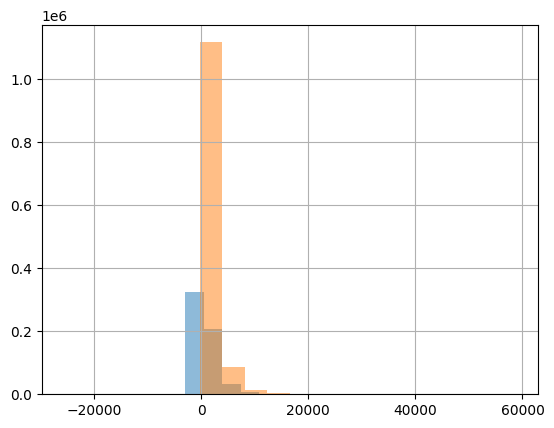

In [3]:
df_filtered.groupby('resolved').account_balance_13_march.hist(alpha=0.5, bins=20)

In [6]:
df_filtered['diff_str'] = ""

for diff in [col for col in df.columns if 'diff' in col and col != 'diff_str']:
    df_filtered['diff_str'] += df_filtered[diff].astype(str)
df_filtered

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,no_of_accounts_diff,account_balance_diff,card_activation_status_diff,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff,rank,diff_str
0,240315173250 DAL1OA3M,0,10010009499,PP,IA PP TR,1,1.0,0.00,21,5/19/2013,...,0,0,0,0,0,0,0,0,1.0,00000000
1,240315124742 DAL15XHK,1,10006021998,BA,IA BA TS nl TR,1,2.0,143.28,21,9/22/2003,...,0,0,0,0,0,0,0,0,1.0,00000000
2,240317114237 DAL3BLK6,2,10016007830,PT,IA AA BA MR nl PT TR,1,12.0,0.00,21,9/4/2017,...,0,0,0,0,0,0,0,0,1.0,00000000
3,240314120849 PHX6PL4U,1,10008003199,BA,IA BA,0,2.0,44.98,21,2/7/2024,...,0,1,0,0,0,0,0,0,1.0,01000000
4,240314145902 DAL68RYS,3,10013002037,BA,IA BA TS nl mm TR,1,6.0,7.00,21,1/2/2022,...,0,0,0,0,0,0,0,0,1.0,00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894160,240314120118 DAL2JPAQ,33,20012001463,BA,IA BA TA nl,0,14.0,1314.94,21,2/8/2022,...,0,0,0,0,0,0,0,0,1.0,00000000
894161,240314120336 DAL4K2UN,33,20012001463,BA,IA BA,0,14.0,1314.94,21,2/8/2022,...,0,0,0,0,0,0,0,0,2.0,00000000
894162,240316190932 PHX2S13U,25,20001160188,PP,IA PP TR,1,7.0,35.66,21,8/24/2023,...,0,0,0,0,0,0,0,0,1.0,00000000
894163,240317213341 PHX35A2C,32,20010020211,FD,IA IA TR,1,8.0,386.63,21,5/15/2019,...,0,0,0,0,0,0,0,0,1.0,00000000


In [12]:
# for the top 10 reasons, what are the changes that occur from 13th to 18th of march
for reason in inds:
    print(f"reason:{reason}")
    print(df_filtered[df_filtered.reason == reason].groupby('diff_str').agg(cnt=('timestamp_call_key', 'count')).sort_values('cnt',ascending=False).head(5))
# what are the columns that change:
    for s in df_filtered[df_filtered.reason == reason].groupby('diff_str').agg(cnt=('timestamp_call_key', 'count')).sort_values('cnt',ascending=False).head(5).index:
        print(f"diff_str:{s}")
        columns = [col for _, col in enumerate(df.columns) if 'diff' in col and col != 'diff_str']
        idx = [i for i, val in enumerate(s) if int(val)]
        print(f"{[columns[i] for i in idx]}")

reason:PP
             cnt
diff_str        
00000000  644657
01000000   16344
01010000    7090
00001000    2892
10000000    2533
diff_str:00000000
[]
diff_str:01000000
['account_balance_diff']
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff']
diff_str:00001000
['ebill_enrolled_status_diff']
diff_str:10000000
['no_of_accounts_diff']
reason:BA
             cnt
diff_str        
00000000  457419
01000000   65263
01010000    7483
00000100    6721
01100000    6618
diff_str:00000000
[]
diff_str:01000000
['account_balance_diff']
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff']
diff_str:00000100
['account_status_diff']
diff_str:01100000
['account_balance_diff', 'card_activation_status_diff']
reason:PT
             cnt
diff_str        
00000000  193535
01000000   15759
01010000    4197
00100000    1508
01100000    1497
diff_str:00000000
[]
diff_str:01000000
['account_balance_diff']
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff']
d

In [13]:
# most popular strings of changes observed
print(df_filtered.groupby('diff_str').agg(cnt=('timestamp_call_key', 'count')).sort_values('cnt',ascending=False).head(5))

              cnt
diff_str         
00000000  1548597
01000000   125327
01010000    23868
00000100    20946
01100000    15595


In [14]:
# what are the columns that change:
for s in df_filtered.groupby('diff_str').agg(cnt=('timestamp_call_key', 'count')).sort_values('cnt',ascending=False).head(5).index:
    print(f"diff_str:{s}")
    columns = [col for _, col in enumerate(df.columns) if 'diff' in col and col != 'diff_str']
    idx = [i for i, val in enumerate(s) if int(val)]
    print(f"{[columns[i] for i in idx]}")

diff_str:00000000
[]
diff_str:01000000
['account_balance_diff']
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff']
diff_str:00000100
['account_status_diff']
diff_str:01100000
['account_balance_diff', 'card_activation_status_diff']


In [15]:
# what are the columns that change if we group by resolved
for resolved in [0,1]:
    print(f"resolved:{resolved}")
    for s in df_filtered[df_filtered.resolved == resolved].groupby('diff_str').agg(cnt=('timestamp_call_key', 'count')).sort_values('cnt',ascending=False).head(5).index:
        print(f"diff_str:{s}")
        columns = [col for _, col in enumerate(df.columns) if 'diff' in col and col != 'diff_str']
        idx = [i for i, val in enumerate(s) if int(val)]
        print(f"{[columns[i] for i in idx]}, length:{len(df_filtered[(df_filtered.resolved == resolved) & (df_filtered.diff_str == s)])}")

resolved:0
diff_str:00000000
[], length:472039
diff_str:01000000
['account_balance_diff'], length:63054
diff_str:01100000
['account_balance_diff', 'card_activation_status_diff'], length:8305
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff'], length:7471
diff_str:00100000
['card_activation_status_diff'], length:6997
resolved:1
diff_str:00000000
[], length:1076558
diff_str:01000000
['account_balance_diff'], length:62273
diff_str:01010000
['account_balance_diff', 'delinquency_history_diff'], length:16397
diff_str:00000100
['account_status_diff'], length:15383
diff_str:00001000
['ebill_enrolled_status_diff'], length:9055


In [16]:
# isolate strings that have changes in them
df_filtered['reason_in_mos'] = df_filtered.apply(lambda x: 1 if x['reason'] in x['mos'] else 0, axis=1)
df_filtered = df_filtered[df_filtered.reason_in_mos == 1]
df_filtered = df_filtered[(df_filtered.diff_str != '00000000')]
#add TR if mos does not have TR sequence in it
df_filtered['mos_TR'] = df_filtered['mos'].apply(lambda x: x+ " TR" if 'TR' not in x else x)
# break apart mos_TR sequence
df_filtered['mos_sequence_between'] = df_filtered.apply(lambda x: x['mos_TR'].split(' ')[x['mos_TR'].split(' ').index(x['reason'])+1:-1], axis = 1)
df_filtered

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,delinquency_history_diff,ebill_enrolled_status_diff,account_status_diff,account_open_date_diff,eservice_diff,rank,reason_in_mos,diff_str,mos_TR,mos_sequence_between
3,240314120849 PHX6PL4U,1,10008003199,BA,IA BA,0,2.0,44.98,33,2/7/2024,...,0,0,0,0,0,1.0,1,01000000,IA BA TR,[]
17,240314081235 DAL1ROPP,3,10013000316,BA,IA AA BA MR nl TR,1,2.0,8.37,33,2/5/2024,...,0,0,1,0,0,1.0,1,01000100,IA AA BA MR nl TR,"[MR, nl]"
18,240314081822 DAL1C80T,3,10013000316,BA,IA AA BA MR nl TR,1,2.0,8.37,33,2/5/2024,...,0,0,1,0,0,2.0,1,01000100,IA AA BA MR nl TR,"[MR, nl]"
23,240315163219 DAL2MQGX,5,10001078402,BA,IA PI BA MR nl nl mt nl mm mo TR,1,4.0,0.00,33,4/19/2023,...,0,0,0,0,0,1.0,1,00100000,IA PI BA MR nl nl mt nl mm mo TR,"[MR, nl, nl, mt, nl, mm, mo]"
35,240315173309 PHX2FWYV,5,10001081909,PT,IA BA MR nl PT TR,1,8.0,831.61,33,4/9/2021,...,0,0,0,0,0,1.0,1,01000000,IA BA MR nl PT TR,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894088,240314215722 PHX7KXNL,33,20022001348,BA,IA IA BA,0,1.0,220.02,9,12/3/2023,...,1,0,0,0,0,1.0,1,01010000,IA IA BA TR,[]
894089,240314215809 DAL3X284,33,20022001348,PT,IA IA BA TS mm mp PT TR,1,1.0,220.02,9,12/3/2023,...,1,0,0,0,0,2.0,1,01010000,IA IA BA TS mm mp PT TR,[]
894132,240316153701 PHX750KD,25,20001150106,BA,IA BA MR nl,0,3.0,-43.29,33,4/3/2016,...,0,0,0,0,0,1.0,1,01000000,IA BA MR nl TR,"[MR, nl]"
894141,240317123330 PHX1STHP,27,20007023476,AT,IA BA TS nl AT,0,4.0,3421.68,33,10/24/2016,...,0,0,0,0,0,1.0,1,01000000,IA BA TS nl AT TR,[]


In [17]:
for reason in inds:
    print(f"for reason {reason}, resolved:{len(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved == 0)])}, not resolved:{len(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved == 1)])}")

for reason PP, resolved:312, not resolved:32898
for reason BA, resolved:71237, not resolved:37695
for reason PT, resolved:341, not resolved:27638
for reason AT, resolved:12397, not resolved:2109
for reason AA, resolved:8622, not resolved:5135
for reason CT, resolved:102, not resolved:5843
for reason wa, resolved:127, not resolved:3071
for reason LS, resolved:1735, not resolved:3431
for reason FD, resolved:0, not resolved:0
for reason LC, resolved:152, not resolved:2302


In [37]:
from collections import defaultdict
frequency_table = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
addition_table = defaultdict(lambda: defaultdict(int))
def get_frequencies(reason,resolved, list_of_strings):
    for i in range(len(list_of_strings)):
        string = ""
        for j in range(i+1, len(list_of_strings)):
            string += list_of_strings[j] + " "
            if abs(j-i) > 1:
                frequency_table[reason][resolved][string] += 1
                addition_table[resolved][string] += 1

df_filtered.apply(lambda x: get_frequencies(x['reason'],x['resolved'], x['mos_sequence_between']), axis=1)
for reason in inds:
    for resolved in [0,1]:
        print(f"for reason {reason}, resolved {resolved}")
        print(sorted(list(frequency_table[reason][resolved].items()), key = lambda x: x[1], reverse=True))

for reason PP, resolved 0
[('nl mm ', 4), ('mm mo ', 2), ('nl mm mo ', 1), ('nl mm mo CA ', 1), ('nl mm mo CA mm ', 1), ('nl mm mo CA mm mo ', 1), ('nl mm mo CA mm mo CT ', 1), ('mm mo CA ', 1), ('mm mo CA mm ', 1), ('mm mo CA mm mo ', 1), ('mm mo CA mm mo CT ', 1), ('mo CA ', 1), ('mo CA mm ', 1), ('mo CA mm mo ', 1), ('mo CA mm mo CT ', 1), ('CA mm ', 1), ('CA mm mo ', 1), ('CA mm mo CT ', 1), ('mm mo CT ', 1), ('mo CT ', 1), ('MR nl ', 1), ('MR nl BA ', 1), ('MR nl BA nl ', 1), ('MR nl BA nl mt ', 1), ('MR nl BA nl mt RS ', 1), ('MR nl BA nl mt RS wa ', 1), ('nl BA ', 1), ('nl BA nl ', 1), ('nl BA nl mt ', 1), ('nl BA nl mt RS ', 1), ('nl BA nl mt RS wa ', 1), ('BA nl ', 1), ('BA nl mt ', 1), ('BA nl mt RS ', 1), ('BA nl mt RS wa ', 1), ('nl mt ', 1), ('nl mt RS ', 1), ('nl mt RS wa ', 1), ('mt RS ', 1), ('mt RS wa ', 1), ('RS wa ', 1)]
for reason PP, resolved 1
[('nl WA ', 24), ('mt RS ', 11), ('mm mo ', 8), ('nl mt ', 8), ('nl mt RS ', 6), ('MR nl ', 5), ('nl ss ', 5), ('mm mo mt 

In [39]:
# are there sequences that are only in resolved or not resolved more than 5000
print(inds)
for reason in inds:
    
    length = len(df_filtered[df_filtered.reason == reason])
    print(f"for reason {reason}, length: {length}")
    for resolved in [0,1]:
        print(f"resolved {resolved}")
        print([seq for seq in set(frequency_table[reason][resolved].keys()) - set(frequency_table[reason][1-resolved].keys()) if frequency_table[reason][resolved][seq] >= 0.1*length])

Index(['PP', 'BA', 'PT', 'AT', 'AA', 'CT', 'wa', 'LS', 'FD', 'LC'], dtype='object', name='reason')
for reason PP, length: 33210
resolved 0
[]
resolved 1
[]
for reason BA, length: 108932
resolved 0
[]
resolved 1
[]
for reason PT, length: 27979
resolved 0
[]
resolved 1
[]
for reason AT, length: 14506
resolved 0
[]
resolved 1
[]
for reason AA, length: 13757
resolved 0
[]
resolved 1
[]
for reason CT, length: 5945
resolved 0
[]
resolved 1
[]
for reason wa, length: 3198
resolved 0
[]
resolved 1
[]
for reason LS, length: 5166
resolved 0
[]
resolved 1
[]
for reason FD, length: 0
resolved 0
[]
resolved 1
[]
for reason LC, length: 2454
resolved 0
[]
resolved 1
[]


In [18]:
# when was the objective first found in the sequence
df_filtered['mos_reason_idx'] = df_filtered.apply(lambda x: x['mos_TR'].split(' ').index(x['reason']), axis = 1)
df_filtered['mos_reason_idx']

3         1
17        2
18        2
23        2
35        4
         ..
894088    2
894089    6
894132    1
894141    4
894155    2
Name: mos_reason_idx, Length: 240100, dtype: int64

resolved
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: mos_reason_idx, dtype: object

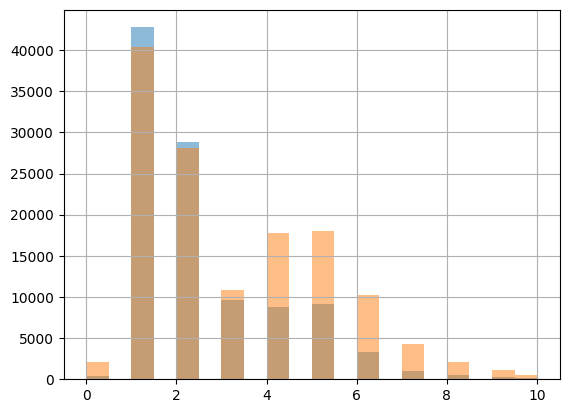

In [19]:
df_filtered.groupby('resolved').mos_reason_idx.hist(alpha=0.5, bins=20)

In [ ]:
# check statistical values on the indices of the reason are found in the sequence
for reason in df.reason.unique():
    for resolved in [0,1]:
        print(f"reason:{reason}, resolved:{resolved}, length: {len(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved == resolved)])}")
        print(df_filtered[(df_filtered.reason == reason) & (df_filtered.resolved== resolved)].mos_reason_idx.describe())

reason:PP, resolved:0, length: 312
count    312.000000
mean       1.448718
std        0.613826
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: mos_reason_idx, dtype: float64
reason:PP, resolved:1, length: 32898
count    32898.000000
mean         1.427230
std          0.590176
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: mos_reason_idx, dtype: float64
reason:BA, resolved:0, length: 71237
count    71237.000000
mean         1.680770
std          0.744129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: mos_reason_idx, dtype: float64
reason:BA, resolved:1, length: 37695
count    37695.000000
mean         1.822178
std          0.805666
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: mos_reason_idx, dtype: float64
reason:PT, resolve

In [27]:
demand = sorted([[len(df_filtered[df_filtered.reason == val]), val] for i, val in enumerate(df_filtered.reason.unique()) if len(df_filtered[df_filtered.reason == val]) > 1000], reverse = True)
actual = sorted([[df_filtered[df_filtered.reason == val]['mos_reason_idx'].mean(), val] for i, val in enumerate(df_filtered.reason.unique()) if len(df_filtered[df_filtered.reason == val]) > 1000])
print(demand)
print(actual)

[[108932, 'BA'], [33210, 'PP'], [27979, 'PT'], [14506, 'AT'], [13757, 'AA'], [5945, 'CT'], [5166, 'LS'], [3691, 'CA'], [3198, 'wa'], [2454, 'LC'], [1896, 'IC'], [1565, 'IA'], [1551, 'mp'], [1545, 'Pd'], [1531, 'AP'], [1366, 'FM'], [1087, 'RC']]
[[0.0044728434504792336, 'IA'], [1.1212473649778294, 'AA'], [1.4274314965371877, 'PP'], [1.72970293394044, 'BA'], [2.899676375404531, 'Pd'], [4.44620253164557, 'IC'], [4.822762994622915, 'AT'], [4.91800878477306, 'FM'], [4.923585546302584, 'PT'], [4.995123272825793, 'CA'], [5.180991095625242, 'LS'], [5.268214055448098, 'mp'], [5.273229070837166, 'RC'], [5.286087524493795, 'AP'], [5.363835155592935, 'CT'], [6.321515892420538, 'LC'], [6.735772357723577, 'wa']]


In [10]:
df_zero = df[df.diff_str == '00000000']

Index(['PP', 'BA', 'PT', 'AT', 'AA', 'CT', 'wa', 'LS', 'FD', 'LC'], dtype='object', name='reason')


<Axes: ylabel='cnt'>

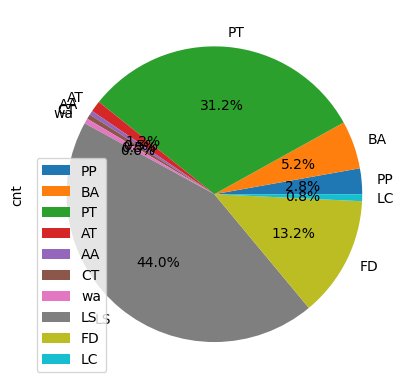

In [13]:
# what are the reasons that users with no change in attributes call for
print(inds)
df_zero[df_zero.reason.isin(inds)].groupby('reason', as_index = False).agg(cnt=('reason', 'count')).plot.pie(y='cnt', labels = inds, autopct='%1.1f%%')

resolved
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: zero, dtype: object

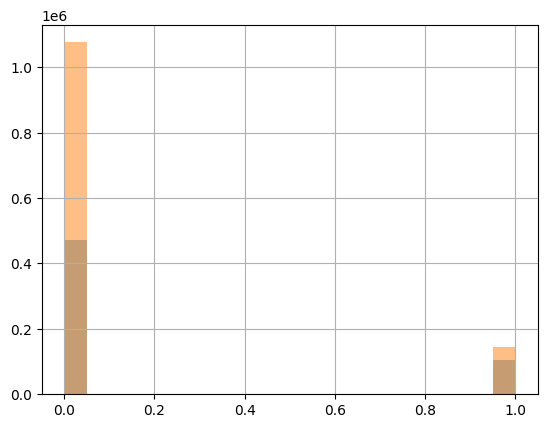

In [14]:
df['zero'] = df.apply(lambda x: 0 if x['diff_str'] == '00000000' else 1, axis=1)
df.groupby('resolved').zero.hist(alpha=0.5, bins=20)

In [1]:
import numpy as np
import glob
import pandas as pd

def load_dataframes(folder_path):
        csv_files = glob.glob(folder_path + '/*.csv')
        dataframes = []
        for file in csv_files:
            df = pd.read_csv(file)
            dataframes.append(df)
        return dataframes

folder_path = r'C:\Users\benni\Box\Data Set for Competition'
dataframes = load_dataframes(folder_path)
df = pd.concat((dataframes[0],dataframes[1]),axis=0)
no_accounts_cols = [col for col in df.columns if 'no_of_accounts' in col]
balance_cols = [col for col in df.columns if 'account_balance' in col]
df[no_accounts_cols] = df[no_accounts_cols].apply(lambda y: y.apply(lambda x: 0 if np.isnan(x) else x), axis = 0)
df[balance_cols ] = df[balance_cols ].apply(lambda y: y.apply(lambda x: 0 if np.isnan(x) else x), axis = 0)
mapping = {'resolved': {val:i for i, val in enumerate(df['resolved'].unique())}
            , 'card_activation': {val:i for i, val in enumerate(set(list(df['card_activation_status_13_march'].unique())+list(df['card_activation_status_18_march'].unique())))}
            , 'eservice': {val:i for i, val in enumerate(set(list(df['eservice_ind_13_march'].unique())+list(df['eservice_ind_18_march'].unique())))}
            , 'account_status': {val:i for i, val in enumerate(set(list(df['account_status_13_march'].unique())+list(df['account_status_18_march'].unique())))}
            , 'delinquency_history': {val:i for i, val in enumerate(set(list(df['delinquency_history_13_march'].unique())+list(df['delinquency_history_18_march'].unique())))}
            , 'retailer_code': {val:i for i, val in enumerate(df['retailer_code'].unique())}
            , 'ebill':{val:i for i, val in enumerate(set(list(df['ebill_enrolled_status_13_march'].unique())+list(df['ebill_enrolled_status_18_march'].unique())))}
         }

df['resolved'] = df['resolved'].map(mapping['resolved'])
df.loc[(df['mos'].str.contains('TR')) & (df.resolved == 0), 'resolved'] = 2
df['card_activation_status_13_march'] = df['card_activation_status_13_march'].map(mapping['card_activation'])
df['card_activation_status_18_march'] = df['card_activation_status_18_march'].map(mapping['card_activation'])
df['eservice_ind_13_march'] = df['eservice_ind_13_march'].map(mapping['eservice'])
df['eservice_ind_18_march'] = df['eservice_ind_18_march'].map(mapping['eservice'])
df['account_status_13_march'] = df['account_status_13_march'].map(mapping['account_status'])
df['account_status_18_march'] = df['account_status_18_march'].map(mapping['account_status'])
df['delinquency_history_13_march'] = df['delinquency_history_13_march'].map(mapping['delinquency_history'])
df['delinquency_history_18_march'] = df['delinquency_history_18_march'].map(mapping['delinquency_history'])
df['retailer_code'] = df['retailer_code'].map(mapping['retailer_code'])
df['ebill_enrolled_status_13_march'] = df['ebill_enrolled_status_13_march'].map(mapping['ebill'])
df['ebill_enrolled_status_18_march'] = df['ebill_enrolled_status_18_march'].map(mapping['ebill'])

df['no_of_accounts_diff'] = df.apply(lambda x:1 if x['no_of_accounts_with_syf_13_march'] != x['no_of_accounts_with_syf_18_march'] else 0 , axis=1)
df['account_balance_diff'] = df.apply(lambda x: 1 if x['account_balance_13_march'] != x['account_balance_18_march'] else 0, axis=1)
df['card_activation_status_diff'] = df.apply(lambda x: 1 if x['card_activation_status_13_march'] != x['card_activation_status_18_march'] else 0, axis=1)
df['delinquency_history_diff'] = df.apply(lambda x: 1 if x['delinquency_history_13_march'] != x['delinquency_history_18_march'] else 0, axis=1)
df['ebill_enrolled_status_diff'] = df.apply(lambda x: 1 if x['ebill_enrolled_status_13_march'] != x['ebill_enrolled_status_18_march'] else 0, axis=1)
df['account_status_diff'] = df.apply(lambda x: 1 if x['account_status_13_march'] != x['account_status_18_march'] else 0, axis=1)
df['account_open_date_diff'] = df.apply(lambda x: 1 if x['account_open_date_13_march'] != x['account_open_date_18_march'] else 0, axis=1)
df['eservice_diff'] = df.apply(lambda x: 1 if x['eservice_ind_13_march'] != x['eservice_ind_18_march'] else 0, axis=1)

In [9]:
pd.set_option('display.max_rows', 500)
df_hangup_PP = df[ (df.resolved == 2) ]
df_hangup_PP[['ebill_enrolled_status_diff', 'reason', 'serial']].pivot_table(index = ['reason','ebill_enrolled_status_diff'],  aggfunc='count')

serial
reason ebill_enrolled_status_diff        
AA     0                             2076
       1                               53
AP     0                              154
       1                                9
AT     0                              177
       1                                3
BA     0                             2904
       1                               49
BL     0                               14
       1                                1
CA     0                               16
       1                                1
CB     0                                7
CD     0                                3
CS     0                                2
CT     0                              106
       1                                9
DE     0                                5
DP     0                               43
DR     0                                7
FD     0                              525
       1                                8
FI     0                                6
FM     0                               18
FR     0                                3
GA     0                               37
IA     0                             2495
       1                               56
IC     0                              922
       1                               10
LC     0                             1835
       1                               66
LS     0                              391
       1                                8
MP     0                                5
PA     0                                4
PC     0                               90
PI     0                               25
PP     0                           637318
       1                             3222
PS     0                               57
       1                                1
PT     0                           198492
       1                             1831
Pd     0                             1314
       1                               21
RC     0                               62
       1                                1
RI     0                                5
       1                                1
RP     0                               69
       1                                3
RV     0                              258
       1                                5
SP     0                                3
SR     0                               22
       1                                2
WA     0                               16
eA     0                                7
       1                                3
eL     0                                5
eP     0                                9
eY     0                                7
       1                                2
iL     0                                9
iM     0                                2
iO     0                               16
       1                                1
iR     0                                5
mP     0                                3
       1                                1
me     0                               12
       1                                4
mn     0                              305
       1                                3
mp     0                               91
       1                                2
wa     0                              107
       1                                3

In [10]:
df_hangup_PP[['eservice_diff', 'reason', 'serial']].pivot_table(index = ['reason', 'eservice_diff'],  aggfunc='count')

serial
reason eservice_diff        
AA     0                2096
       1                  33
AP     0                 161
       1                   2
AT     0                 180
BA     0                2927
       1                  26
BL     0                  15
CA     0                  17
CB     0                   7
CD     0                   3
CS     0                   2
CT     0                 112
       1                   3
DE     0                   5
DP     0                  42
       1                   1
DR     0                   7
FD     0                 525
       1                   8
FI     0                   6
FM     0                  18
FR     0                   3
GA     0                  37
IA     0                2506
       1                  45
IC     0                 926
       1                   6
LC     0                1901
LS     0                 397
       1                   2
MP     0                   5
PA     0                   4
PC     0                  90
PI     0                  24
       1                   1
PP     0              639830
       1                 710
PS     0                  58
PT     0              199682
       1                 641
Pd     0                1325
       1                  10
RC     0                  63
RI     0                   5
       1                   1
RP     0                  71
       1                   1
RV     0                 263
SP     0                   3
SR     0                  22
       1                   2
WA     0                  16
eA     0                  10
eL     0                   5
eP     0                   9
eY     0                   8
       1                   1
iL     0                   8
       1                   1
iM     0                   2
iO     0                  16
       1                   1
iR     0                   5
mP     0                   3
       1                   1
me     0                  12
       1                   4
mn     0                 306
       1                   2
mp     0                  91
       1                   2
wa     0                 109
       1                   1

In [20]:
df['mos_length'] = df.apply(lambda x: len(x.mos.split(' ')), axis = 1)
df.rename(columns = {'mos_length':'Length of Mos'}, inplace = True)
df[['mos_length', 'reason']].groupby('reason').describe().sort_values(('mos_length','count'), ascending = False)

mos_length                                                     
            count       mean       std   min    25%   50%    75%   max
reason                                                                
PP       678314.0   3.337161  0.569853   2.0   3.00   3.0   4.00  11.0
BA       566351.0   4.455472  2.263050   2.0   3.00   4.0   6.00  11.0
PT       221583.0   6.932025  1.110010   1.0   6.00   7.0   8.00  11.0
AT        91404.0   6.424117  1.405416   4.0   6.00   6.0   7.00  11.0
AA        54861.0   5.022056  2.093988   2.0   3.00   5.0   6.00  11.0
CT        23796.0   8.989494  1.441780   4.0   8.00   9.0  10.00  11.0
wa        14296.0   8.672286  1.672226   4.0   7.00   9.0  10.00  11.0
LS        13765.0   7.235670  2.212279   1.0   6.00   7.0   9.00  11.0
FD        13007.0   2.736834  1.256023   2.0   2.00   2.0   3.00  11.0
LC        10076.0   7.487297  1.607037   4.0   6.00   7.0   8.00  11.0
IC         8911.0   6.597352  1.857834   3.0   5.00   7.0   8.00  11.0
IA         7617.0   2.348562  0.968081   1.0   2.00   2.0   2.00   7.0
mp         7614.0   8.419228  1.716542   4.0   7.00   8.0  10.00  11.0
Pd         7125.0   4.976561  1.221364   3.0   4.00   5.0   6.00  11.0
DP         6930.0   5.369841  1.351976   2.0   5.00   5.0   6.00  11.0
AP         6729.0   7.485510  1.540227   4.0   6.00   7.0   8.00  11.0
CA         5920.0   8.248649  1.354661   4.0   7.00   8.0   9.00  11.0
WA         4910.0   7.829328  1.803946   4.0   6.00   7.0   9.00  11.0
FM         4755.0   6.676972  1.404499   4.0   6.00   6.0   7.00  11.0
RC         4185.0   7.963202  1.576471   4.0   7.00   8.0   9.00  11.0
mn         4028.0   4.316038  1.581703   2.0   3.00   4.0   5.00  11.0
RV         3756.0   2.607561  0.666398   2.0   2.00   3.0   3.00   8.0
CB         3694.0   4.167028  1.634977   2.0   3.00   4.0   5.00  11.0
PI         3447.0   2.451697  0.650396   2.0   2.00   2.0   3.00   7.0
SP         2694.0   6.426503  1.754412   4.0   5.00   6.0   7.00  11.0
PA         2608.0   7.701687  1.992690   4.0   6.00   7.0   9.00  11.0
RP         2443.0   7.602538  1.423315   5.0   7.00   7.0   8.00  11.0
iR         2162.0   8.246994  1.952716   4.0   7.00   8.0  10.00  11.0
me         2150.0   7.261860  1.511484   4.0   6.00   7.0   8.00  11.0
iL         2071.0   7.821342  2.080958   4.0   6.00   8.0  10.00  11.0
GA         2042.0   7.805093  1.667105   4.0   7.00   7.0   9.00  11.0
PS         1772.0   7.980813  1.692536   4.0   7.00   8.0   9.00  11.0
eL         1642.0   7.292935  1.497123   4.0   6.00   7.0   8.00  11.0
DR         1524.0   3.120735  1.084053   2.0   2.00   3.0   4.00  10.0
MP         1503.0   9.031936  1.787750   5.0   7.00   9.0  11.00  11.0
FR         1273.0   4.637863  1.949451   2.0   3.00   4.0   6.00  11.0
eY         1192.0   7.380034  1.599970   4.0   6.00   7.0   8.00  11.0
SR         1070.0   8.394393  1.835510   4.0   7.00   8.0  10.00  11.0
RI          873.0   5.564719  2.153138   3.0   4.00   5.0   7.00  11.0
eP          769.0   7.271782  1.556320   4.0   6.00   7.0   8.00  11.0
PC          743.0   7.258412  1.246226   5.0   6.00   7.0   8.00  11.0
eA          697.0   8.784792  1.649503   5.0   8.00   9.0  11.00  11.0
CD          477.0   7.266247  1.297369   5.0   6.00   7.0   8.00  11.0
DE          282.0   7.244681  1.383838   5.0   6.00   7.0   8.00  11.0
eR          255.0   7.980392  1.412684   5.0   7.00   8.0   9.00  11.0
iM          215.0   8.469767  1.942579   4.0   7.00   9.0  10.00  11.0
mP          178.0   6.853933  1.598379   4.0   6.00   7.0   7.00  11.0
FI          174.0   2.574713  0.551030   2.0   2.00   3.0   3.00   4.0
BL          174.0   8.413793  1.373168   5.0   7.00   8.0   9.00  11.0
ER          107.0   7.971963  1.550763   5.0   7.00   8.0   9.00  11.0
iA           87.0   8.885057  1.714679   6.0   8.00   9.0  11.00  11.0
VA           82.0   7.195122  1.543117   5.0   6.00   7.0   8.00  11.0
RS           72.0   6.861111  0.892939   6.0   6.00   7.0   7.00   9.0
CS           71.0   7.070423  1

In [22]:
len(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march'])

23